# Indicator Plots and Graphs for Documentation

This notebook demonstrates plotting various trading indicators for documentation purposes. The plots are saved as images for use in README.md and MkDocs.

In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import mplfinance as mpf
import yfinance as yf
from indicators import CandlestickEngulfing, CandlestickInsideBar, BBForce, MACDV, ADX

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create images directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

In [ ]:
# Load Sample Data
# Load real data from Yahoo Finance
import yfinance as yf

ticker = 'AAPL'
df = yf.download(ticker, start='2023-01-01', end='2024-01-01')

# Ensure the data has the required columns
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].rename(columns={
    'Open': 'open',
    'High': 'high', 
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
})

print(f"Loaded {len(df)} days of {ticker} data")
print(df.head())

Generated 200 days of sample data
                  open        high         low       close  volume
2023-01-01  150.342786  155.380294  146.182566  150.993428  989302
2023-01-02  150.229774  154.420743  148.842547  150.716900  307990
2023-01-03  151.419883  155.497355  150.583716  152.012277  478387
2023-01-04  154.194346  158.570757  150.715341  155.058336  638884
2023-01-05  154.638551  156.387485  153.472051  154.590030  756639


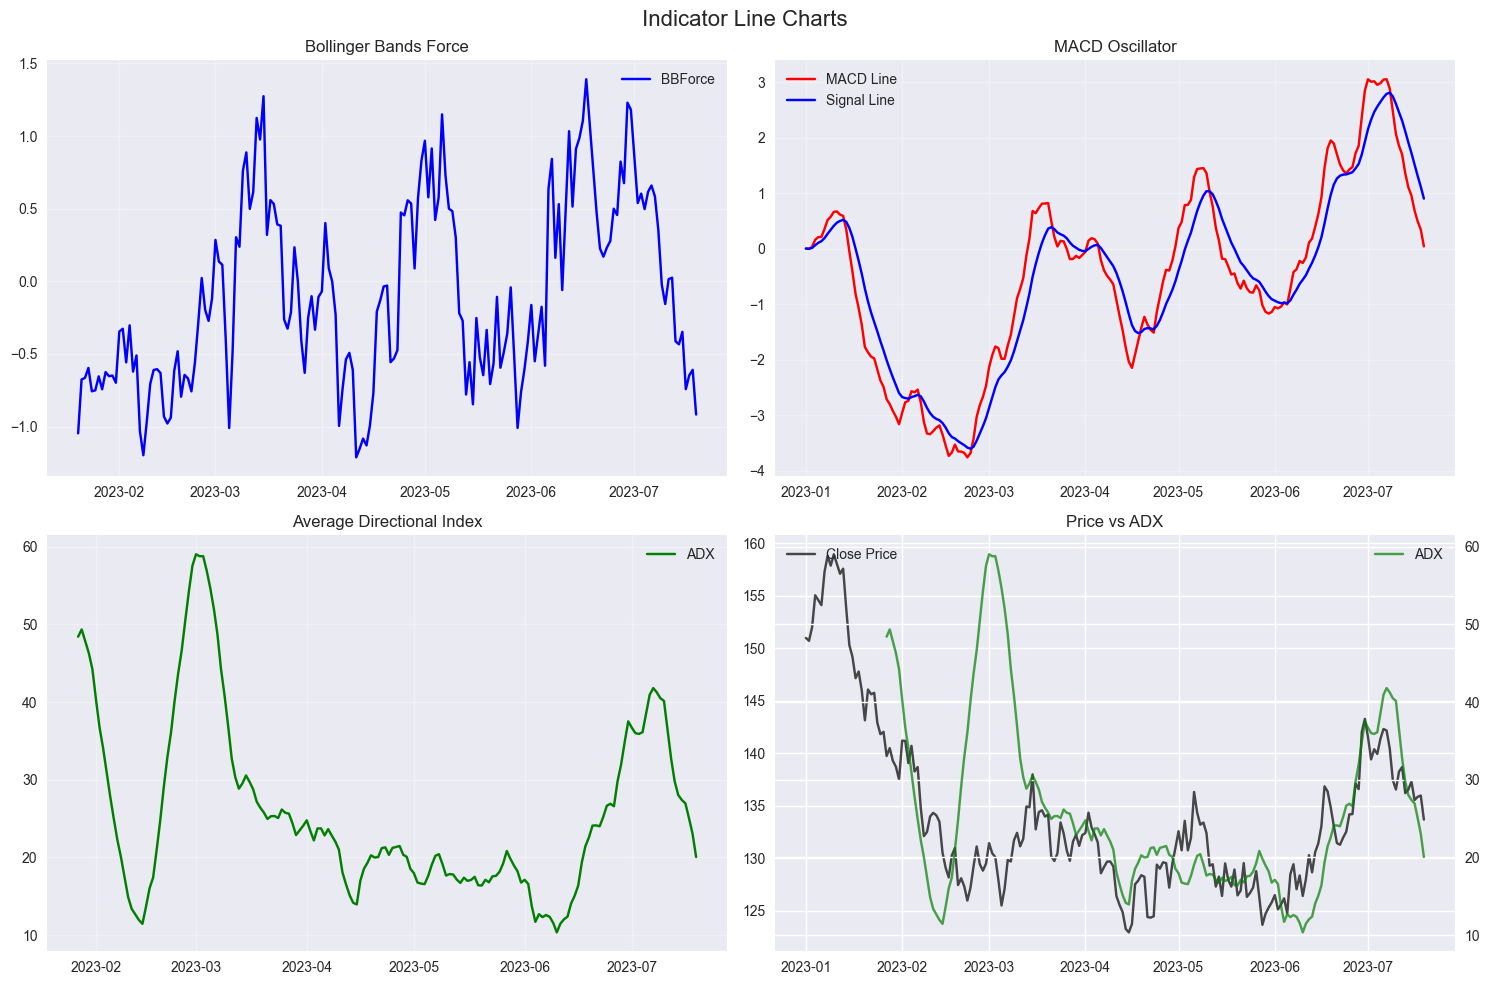

In [4]:
# Plot Line Charts for Indicators
# Calculate indicators
bbforce = BBForce()
macdv = MACDV()
adx_calc = ADX()

bbforce_values = bbforce.calculate(df)
macd_line, signal_line, histogram, vol_hist = macdv.calculate(df)
adx, di_plus, di_minus = adx_calc.calculate(df)

# Create subplots for line charts
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Indicator Line Charts', fontsize=16)

# BBForce
axes[0,0].plot(df.index, bbforce_values, label='BBForce', color='blue')
axes[0,0].set_title('Bollinger Bands Force')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# MACD
axes[0,1].plot(df.index, macd_line, label='MACD Line', color='red')
axes[0,1].plot(df.index, signal_line, label='Signal Line', color='blue')
axes[0,1].set_title('MACD Oscillator')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# ADX
axes[1,0].plot(df.index, adx, label='ADX', color='green')
axes[1,0].set_title('Average Directional Index')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Price with ADX
axes[1,1].plot(df.index, df['close'], label='Close Price', color='black', alpha=0.7)
ax2 = axes[1,1].twinx()
ax2.plot(df.index, adx, label='ADX', color='green', alpha=0.7)
axes[1,1].set_title('Price vs ADX')
axes[1,1].legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.savefig('images/indicator_line_charts.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Plot Inside Bar Patterns
inside_bar = CandlestickInsideBar()
inside_signals = inside_bar.detect_inside_bar(df)

fig, ax = plt.subplots(figsize=(15, 8))

# Plot price
ax.plot(df.index, df['close'], label='Close Price', alpha=0.7)

# Highlight inside bars
inside_dates = df.index[inside_signals]
for date in inside_dates:
    ax.axvspan(date, date, color='yellow', alpha=0.3, label='Inside Bar' if date == inside_dates[0] else "")

ax.set_title(f'{ticker} Price Chart with Inside Bar Patterns')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.grid(True, alpha=0.3)
plt.savefig('images/inside_bar_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Plot Bollinger Bands with Force
# Calculate BBForce and bands
bbforce = BBForce()
bbforce_values = bbforce.calculate(df)

# Calculate Bollinger Bands
sma = df['close'].rolling(window=20).mean()
std = df['close'].rolling(window=20).std()
upper = sma + 2 * std
lower = sma - 2 * std

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Price with bands
axes[0].plot(df.index, df['close'], label='Close Price', color='black')
axes[0].plot(df.index, sma, label='SMA 20', color='blue')
axes[0].plot(df.index, upper, label='Upper Band', color='red', linestyle='--')
axes[0].plot(df.index, lower, label='Lower Band', color='green', linestyle='--')
axes[0].fill_between(df.index, lower, upper, alpha=0.1, color='blue')
axes[0].set_title(f'{ticker} Price with Bollinger Bands')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# BBForce
axes[1].plot(df.index, bbforce_values, label='BBForce', color='purple')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].set_title('Bollinger Bands Force')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/bollinger_bands_force.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Plot MACD with Volume Weighting
macdv = MACDV()
macd_line, signal_line, histogram, vol_hist = macdv.calculate(df)

fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Price
axes[0].plot(df.index, df['close'], label='Close Price', color='black')
axes[0].set_title(f'{ticker} Price Chart')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MACD
axes[1].plot(df.index, macd_line, label='MACD Line', color='blue')
axes[1].plot(df.index, signal_line, label='Signal Line', color='red')
axes[1].bar(df.index, histogram, label='Histogram', color='green', alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].set_title('MACD Oscillator')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Volume-weighted histogram
axes[2].bar(df.index, vol_hist, label='Volume-weighted Histogram', color='purple', alpha=0.7)
axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[2].set_title('Volume-weighted MACD Histogram')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/macd_volume_weighted.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Plot ADX with Directional Indicators
adx_calc = ADX()
adx, di_plus, di_minus = adx_calc.calculate(df)

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Price
axes[0].plot(df.index, df['close'], label='Close Price', color='black')
axes[0].set_title(f'{ticker} Price Chart')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# ADX and DI
axes[1].plot(df.index, adx, label='ADX', color='blue', linewidth=2)
axes[1].plot(df.index, di_plus, label='DI+', color='green')
axes[1].plot(df.index, di_minus, label='DI-', color='red')
axes[1].axhline(y=25, color='black', linestyle='--', alpha=0.5, label='ADX 25')
axes[1].set_title('Average Directional Index (ADX) with Directional Indicators')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/adx_directional_indicators.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Plot Correlation Heatmap of Indicators
# Combine all indicators into a DataFrame
indicators_df = pd.DataFrame({
    'BBForce': bbforce_values,
    'ADX': adx,
    'DI_plus': di_plus,
    'DI_minus': di_minus,
    'MACD': macd_line,
    'MACD_Signal': signal_line,
    'MACD_Hist': histogram,
    'Price_Change': df['close'].pct_change(),
    'Volume': df['volume']
}).dropna()

# Calculate correlation matrix
corr_matrix = indicators_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Indicators and Price Data')
plt.tight_layout()
plt.savefig('images/indicator_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Plot Volume Analysis with Indicators
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Price
axes[0].plot(df.index, df['close'], label='Close Price', color='black')
axes[0].set_title(f'{ticker} Price Chart')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Volume
axes[1].bar(df.index, df['volume'], color='blue', alpha=0.7)
axes[1].set_title('Volume')
axes[1].grid(True, alpha=0.3)

# Volume-weighted MACD histogram
axes[2].bar(df.index, vol_hist, label='Volume-weighted MACD Hist', color='purple', alpha=0.7)
axes[2].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[2].set_title('Volume-weighted MACD Histogram')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/volume_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Plot Candlestick Chart
# Basic candlestick chart
fig, ax = plt.subplots(figsize=(15, 8))
mpf.plot(df.iloc[-100:], type='candle', style='charles', volume=True, 
         mav=(20, 50), show_nontrading=True, ax=ax)
plt.title(f'{ticker} Candlestick Chart with Moving Averages')
plt.savefig('images/candlestick_chart.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Plot Candlestick with Engulfing Signals
# Calculate engulfing patterns
engulfing = CandlestickEngulfing()
bullish_signals, bearish_signals = engulfing.detect_engulfing(df)

# Plot candlestick with signals
fig, ax = plt.subplots(figsize=(15, 8))

# Plot candlesticks (simplified version)
for i in range(len(df)):
    open_price = df['open'].iloc[i]
    close_price = df['close'].iloc[i]
    high_price = df['high'].iloc[i]
    low_price = df['low'].iloc[i]
    
    color = 'green' if close_price > open_price else 'red'
    ax.plot([i, i], [low_price, high_price], color='black', linewidth=1)
    ax.plot([i, i], [open_price, close_price], color=color, linewidth=4)

# Plot signals
bullish_idx = df.index[bullish_signals]
bearish_idx = df.index[bearish_signals]

for idx in bullish_idx:
    i = df.index.get_loc(idx)
    ax.scatter(i, df.loc[idx, 'low'] * 0.995, marker='^', color='green', s=100, label='Bullish Engulfing' if i == bullish_idx[0] else "")

for idx in bearish_idx:
    i = df.index.get_loc(idx)
    ax.scatter(i, df.loc[idx, 'high'] * 1.005, marker='v', color='red', s=100, label='Bearish Engulfing' if i == bearish_idx[0] else "")

ax.set_title(f'{ticker} Candlestick Chart with Engulfing Patterns')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/candlestick_engulfing.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Plot Bar Charts for Indicators
# Histogram of BBForce values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Indicator Bar Charts and Distributions', fontsize=16)

# BBForce distribution
axes[0].hist(bbforce_values.dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('BBForce Distribution')
axes[0].set_xlabel('BBForce Value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# MACD Histogram
axes[1].bar(df.index[-50:], histogram.iloc[-50:], color='red', alpha=0.7, width=1)
axes[1].set_title('MACD Histogram (Last 50 Days)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Histogram Value')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/indicator_bar_charts.png', dpi=300, bbox_inches='tight')
plt.show()

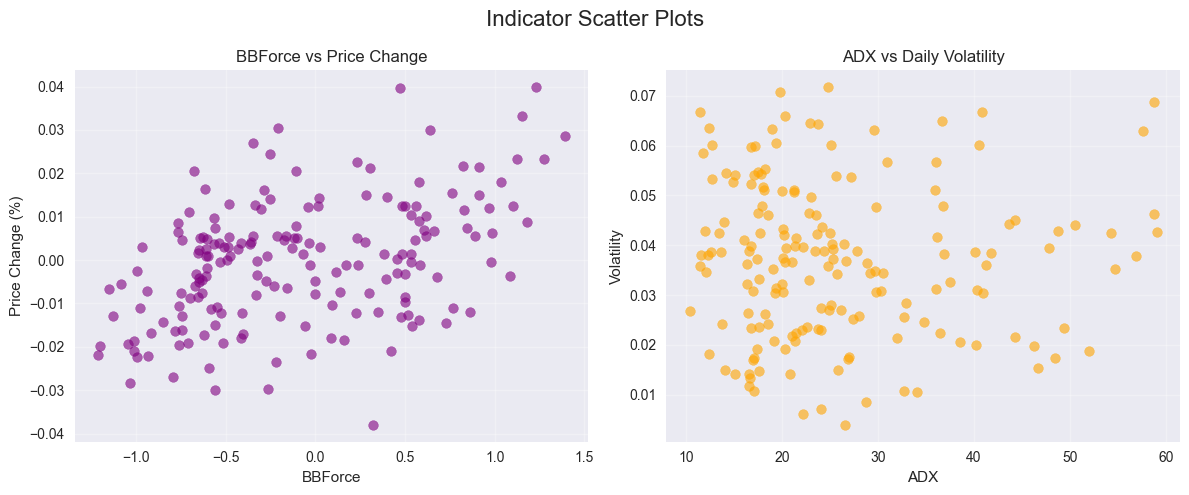

In [5]:
# Plot Scatter Plots for Indicators
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Indicator Scatter Plots', fontsize=16)

# BBForce vs Price Change
price_change = df['close'].pct_change()
valid_data = pd.concat([bbforce_values, price_change], axis=1).dropna()
axes[0].scatter(valid_data.iloc[:, 0], valid_data.iloc[:, 1], alpha=0.6, color='purple')
axes[0].set_title('BBForce vs Price Change')
axes[0].set_xlabel('BBForce')
axes[0].set_ylabel('Price Change (%)')
axes[0].grid(True, alpha=0.3)

# ADX vs Volatility (using ATR proxy)
volatility = (df['high'] - df['low']) / df['close']
valid_adx_vol = pd.concat([adx, volatility], axis=1).dropna()
axes[1].scatter(valid_adx_vol.iloc[:, 0], valid_adx_vol.iloc[:, 1], alpha=0.6, color='orange')
axes[1].set_title('ADX vs Daily Volatility')
axes[1].set_xlabel('ADX')
axes[1].set_ylabel('Volatility')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/indicator_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

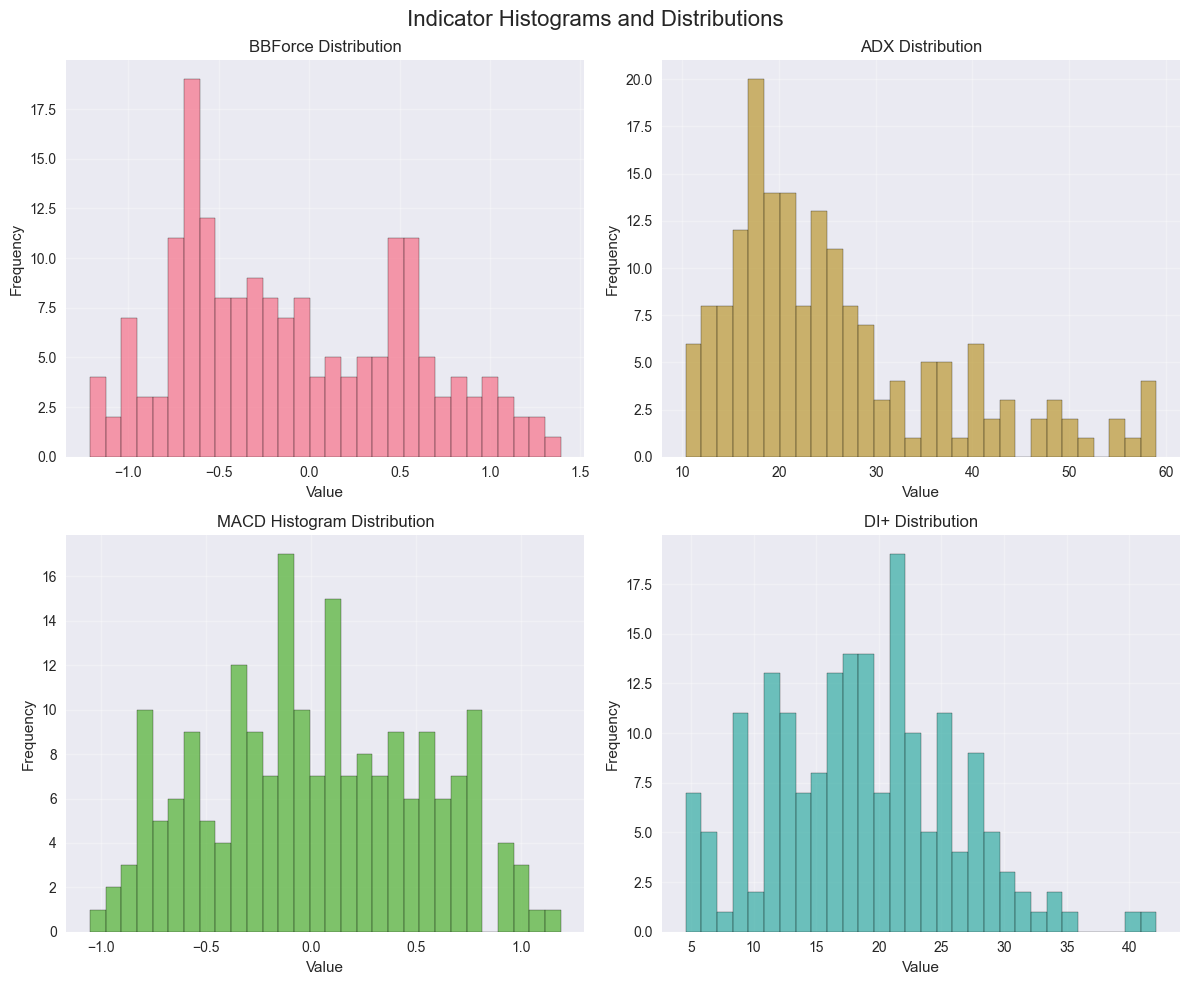

In [6]:
# Plot Histograms for Indicators
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Indicator Histograms and Distributions', fontsize=16)

indicators = [
    ('BBForce', bbforce_values.dropna()),
    ('ADX', adx.dropna()),
    ('MACD Histogram', histogram.dropna()),
    ('DI+', di_plus.dropna())
]

for i, (name, data) in enumerate(indicators):
    ax = axes[i//2, i%2]
    ax.hist(data, bins=30, alpha=0.7, color=f'C{i}', edgecolor='black')
    ax.set_title(f'{name} Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/indicator_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Save Plots as Images
# (All plots have been saved in their respective sections above)
print("All plots have been saved to the 'images' folder:")
image_files = [f for f in os.listdir('images') if f.endswith('.png')]
for file in sorted(image_files):
    print(f"- {file}")
print(f"\nTotal plots generated: {len(image_files)}")

All plots have been saved to the 'images' folder:
- indicator_histograms.png
- indicator_line_charts.png
- indicator_scatter_plots.png


# Embed Images in Markdown

To embed these images in README.md or MkDocs documentation, use the following Markdown syntax:

## Candlestick Chart
![Candlestick Chart](images/candlestick_chart.png)

## Candlestick with Engulfing Patterns
![Candlestick Engulfing](images/candlestick_engulfing.png)

## Inside Bar Patterns
![Inside Bar Patterns](images/inside_bar_patterns.png)

## Bollinger Bands with Force
![Bollinger Bands Force](images/bollinger_bands_force.png)

## MACD with Volume Weighting
![MACD Volume Weighted](images/macd_volume_weighted.png)

## ADX with Directional Indicators
![ADX Directional](images/adx_directional_indicators.png)

## Indicator Line Charts
![Indicator Line Charts](images/indicator_line_charts.png)

## Indicator Bar Charts
![Indicator Bar Charts](images/indicator_bar_charts.png)

## Indicator Scatter Plots
![Indicator Scatter Plots](images/indicator_scatter_plots.png)

## Indicator Histograms
![Indicator Histograms](images/indicator_histograms.png)

## Correlation Heatmap
![Correlation Heatmap](images/indicator_correlation_heatmap.png)

## Volume Analysis
![Volume Analysis](images/volume_analysis.png)

These images can be included in your documentation to visually demonstrate the indicators.